<a href="https://colab.research.google.com/github/Amitgm/supervised_learning/blob/master/stacked_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import os
from IPython.display import Image, display
from PIL import Image as pilimage

import numpy as np

In [ ]:
%cd /content

/content


In [ ]:
if not (os.path.isfile('rgb.mp4')):
  !wget -O rgb.mp4 https://rpg.ifi.uzh.ch/data/E2VID/datasets/driving_gen3/external_videos/highway1.mp4 # getting the video files from link




In [ ]:
if not (os.path.isfile('rgb3.mp4')):
  !wget -O rgb2.mp4 https://rpg.ifi.uzh.ch/data/E2VID/datasets/driving_gen3/external_videos/back3.mp4 

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # cloning the yolo alogrithm

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!pip3 install -r yolov5/requirements.txt

In [ ]:
import torch
from yolov5 import utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # mount the drive

In [ ]:
if not (os.path.isfile('rgb')):
  !cp -r /content/drive/MyDrive/rgb /content/rgb3   # copy the files for rgb data

In [110]:
if not (os.path.isfile('event')):
  !cp -r /content/drive/MyDrive/events/frames /content/events  

In [ ]:
frames=[]
for file in os.listdir("/content/rgb3/data"):
    if file.endswith(".png"):
        frames.append(os.path.join('/content/rgb3/data',file))  # for rgb data
        #frames.append(file)

In [111]:
event_frames=[]
for file in os.listdir("/content/events"):
    if file.endswith(".png"):
        event_frames.append(os.path.join('/content/events',file)) # for events data

In [119]:
frames.sort()
event_frames.sort()



In [ ]:
display(Image(event_frames[0]))
display(Image(frames[0]))

In [128]:
if not (os.path.isdir('stacked')):
  !mkdir stacked

  num_files = len([_ for _ in os.listdir('/content/events') if _.endswith(".png")])
  for i in range(0, num_files):
    # load the image
    rgb = pilimage.open(frames[i])
    event = pilimage.open(event_frames[i])

    # convert image to numpy array
    rgb_data = np.asarray(rgb)
    event_data = np.asarray(event)
    stacked_data = np.ones(rgb_data.shape)

    # stack images
    height = rgb_data.shape[0]
    width = rgb_data.shape[1]

    for h in range(0,height):
      for w in range(0,width):
        if (event_data[h][w].sum() == 0):
          stacked_data[h][w] = rgb_data[h][w]
        else:
          stacked_data[h][w] = event_data[h][w]

    # save
    stacked = pilimage.fromarray(stacked_data.astype(np.uint8))
    name = os.path.basename(event_frames[i])
    stacked.save('/content/stacked/' + name)

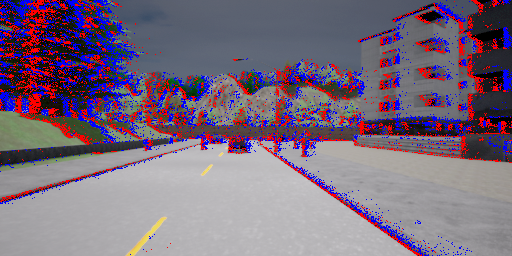

In [131]:
display(Image('/content/stacked/0005.png')) 

In [132]:
stacked_frames=[]
for file in os.listdir("/content/stacked"):
    if file.endswith(".png"):
        stacked_frames.append(os.path.join('/content/stacked',file))

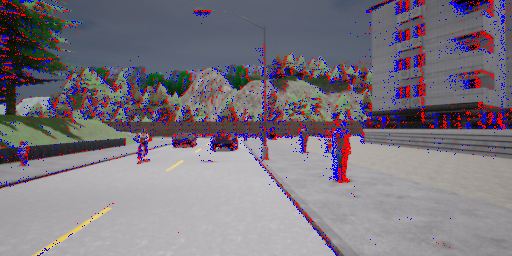

In [134]:
display(Image(stacked_frames[183])) 

In [136]:
!python yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source '/content/stacked'

detect: weights=['yolov5s.pt'], source=/content/stacked, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-161-ge54e758 torch 1.10.0+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/184 /content/stacked/0000.png: 320x640 4 persons, 2 cars, Done. (0.240s)
image 2/184 /content/stacked/0001.png: 320x640 2 persons, 1 kite, Done. (0.214s)
image 3/184 /content/stacked/0002.png: 320x640 1 person, Done. (0.216s)
image 4/184 /content/stacked/0003.png: 320x640 2 persons, 1 kite, Done. (0.206s)
image 5/184 /content/stacked/0004.png: 320x640 1 person, 2 kites, Done. (0.206s)
image 6/1

In [137]:
stack_detected_frames=[]
for file in os.listdir("yolov5/runs/detect/exp6"):
        stack_detected_frames.append(os.path.join('yolov5/runs/detect/exp6',file))
        #frames.append(file)

In [ ]:
detected_frames=[]
for file in os.listdir("yolov5/runs/detect/exp3"):
        detected_frames.append(os.path.join('yolov5/runs/detect/exp3',file))
        #frames.append(file)

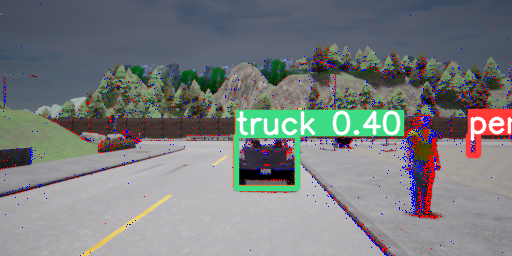

In [138]:
display(Image(stack_detected_frames[111])) # Displaying image data

In [ ]:
!python yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source '/content/rgb2.mp4'

detect: weights=['yolov5s.pt'], source=/content/rgb2.mp4, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-161-ge54e758 torch 1.10.0+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
video 1/1 (1/1461) /content/rgb2.mp4: 384x640 1 person, 3 cars, 1 motorcycle, 3 trucks, 1 bench, Done. (0.282s)
video 1/1 (2/1461) /content/rgb2.mp4: 384x640 1 person, 5 cars, 1 motorcycle, 4 trucks, 1 bench, Done. (0.273s)
video 1/1 (3/1461) /content/rgb2.mp4: 384x640 1 person, 4 cars, 1 motorcycle, 3 trucks, Done. (0.249s)
video 1/1 (4/1461) /content/rgb2.mp4: 384x640 1 person, 3 cars, 1 motorcycle,

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('yolov5/runs/detect/exp4/rgb2.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)